In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from numpy import exp
from numpy import sin
from numpy import tanh


In [3]:
def e(z):
    return sin(z*5)/2 + 0.5

In [4]:
def H(z):
    return -tanh(((c2+c1)*(z-(c2+c1)/2))/(c2-c1))

In [24]:
def l (z,s):
    return e(z)/(1+exp(-a1*s+b1)) + (1-e(z))/(1+exp(-a2*s+b2))

In [25]:
def l_diff(z,s):
    return e(z) * (a1*exp(-a1*s+b1))/(1+exp(-a1*s+b1))**2 + (1-e(z)) * (a2*exp(-a2*s+b2))/(1+exp(-a2*s+b2))**2 

In [36]:
def integral(s,z):
    return H(z-s)*l_diff(z,s)

In [35]:
def functional_integration(z):        
    return quad(integral, 0, z, args=(z))[0]

In [17]:
def direct_integration(z):
    int_sum = 0
    step = 0.01
    s = 0
    while s < z:
        int_sum = int_sum + H(z-s)*l_diff(z,s)*step
        s = s + step    
    return int_sum
    

In [18]:
z = np.linspace(0,10)
M = np.zeros(z.shape[0])

In [19]:
for i in range(z.shape[0]):
  M[i] = direct_integration(z[i])

In [37]:
vec_expint = np.vectorize(functional_integration)

In [38]:
vec_expint(np.linspace(0,10))

array([ 0.00000000e+00,  6.60675034e-04,  1.50995309e-03,  2.52262487e-02,
        1.03714671e-01,  2.12237404e-01,  2.20029654e-01,  7.05905448e-02,
        2.08227874e-02,  3.26927330e-01,  7.85095994e-01,  9.45571762e-01,
        6.46780137e-01,  1.89883501e-01,  2.87771165e-02,  3.23913764e-01,
        7.92926817e-01,  9.91668160e-01,  7.46696743e-01,  3.17419923e-01,
        1.32190047e-01,  3.53740626e-01,  7.10386634e-01,  8.01341569e-01,
        5.77372623e-01,  4.04374964e-01,  4.82077842e-01,  4.23446504e-01,
       -1.15951611e-01, -7.02576349e-01, -6.26644619e-01,  1.20482192e-01,
        7.77660242e-01,  6.42515036e-01, -1.87475694e-01, -9.11236723e-01,
       -8.27143915e-01, -3.00174996e-02,  6.88578741e-01,  6.28925100e-01,
       -1.35519610e-01, -8.65350053e-01, -9.20435310e-01, -3.77951394e-01,
        1.20266812e-01,  6.97845030e-02, -4.29893660e-01, -8.89199445e-01,
       -9.79866933e-01, -7.93931032e-01])

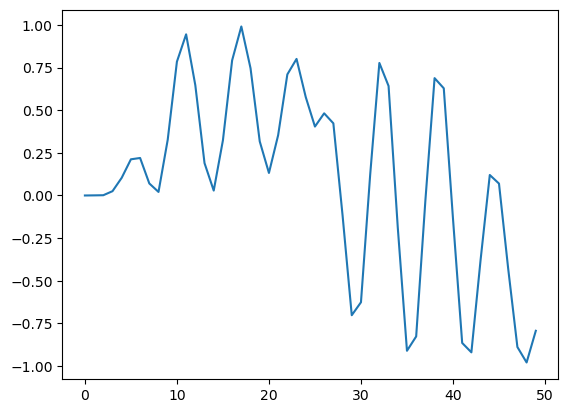

In [39]:
plt.plot(vec_expint(np.linspace(0,10)))

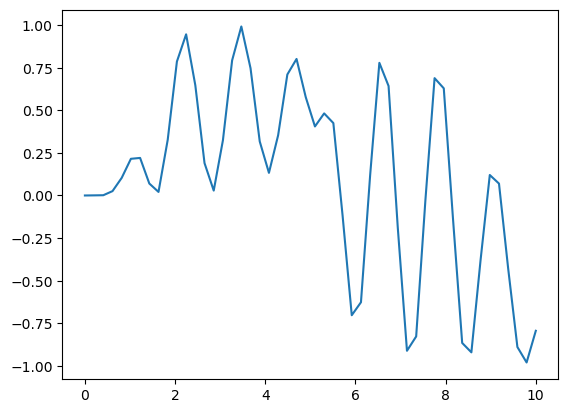

In [20]:
plt.plot(z,M)